In [1]:
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Image

init_notebook_mode(connected=True) # run at the start of every ipython notebook to use plotly.offline
                     # this injects the plotly.js source files into the notebook


import pandas as pd
from pandas.tools.plotting import autocorrelation_plot
import datetime
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

import statsmodels as sm
import statsmodels.api as sma



sns.set(style="ticks")

In [2]:
def parseDate(dateStr):
    dateStr = str(dateStr)
    dat = pd.datetime.strptime(dateStr, '%Y%m%d')
    return datetime.datetime(dat.year, dat.month, calendar.monthrange(dat.year, dat.month)[1])

In [3]:
dateparse = lambda x: parseDate(x)

df = pd.read_csv("Global_5_Factors.csv", parse_dates=True,index_col=0, sep=";",date_parser=dateparse)
df = df / 100

In [4]:
df.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1990-07-31,0.0079,0.0007,0.0024,0.0009,0.0167,0.0068
1990-08-31,-0.1076,-0.0156,0.0042,0.0020,0.0109,0.0066
1990-09-30,-0.1224,0.0168,0.0034,0.0047,0.0207,0.0060
1990-10-31,0.0958,-0.0811,-0.0329,0.0130,0.0128,0.0068
1990-11-30,-0.0387,0.0162,0.0068,0.0199,-0.0260,0.0057


In [5]:
fig = tools.make_subplots(rows=6, cols=1, subplot_titles=list(df.columns))    
fig['layout'].update(title='Levels',showlegend=False)

i = 1
for col in list(df.columns):
    data = go.Scatter(
        x=df.index,
        y=df[col]
    )
    fig.append_trace(data, i, 1)
    i += 1

iplot(fig, )
# Image(filename='my_plot.png') 

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]
[ (4,1) x4,y4 ]
[ (5,1) x5,y5 ]
[ (6,1) x6,y6 ]



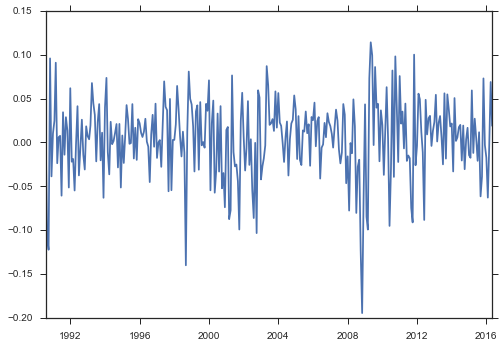

In [6]:
plt.plot(df['Mkt-RF'])

# Autocorrelations

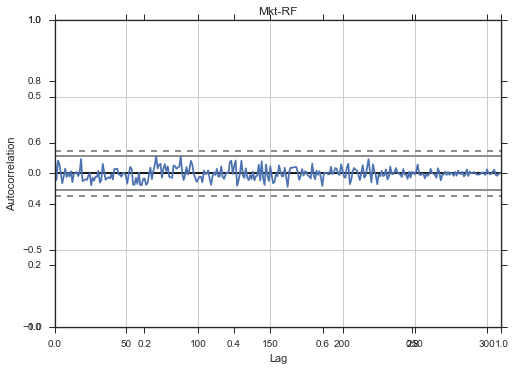

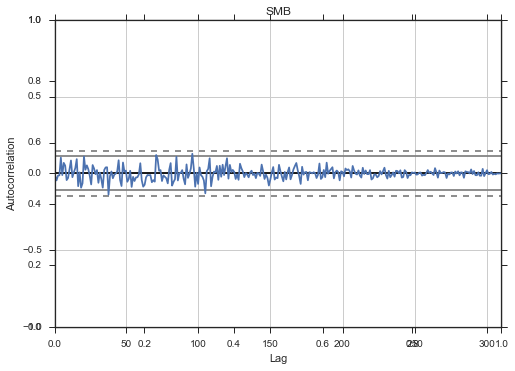

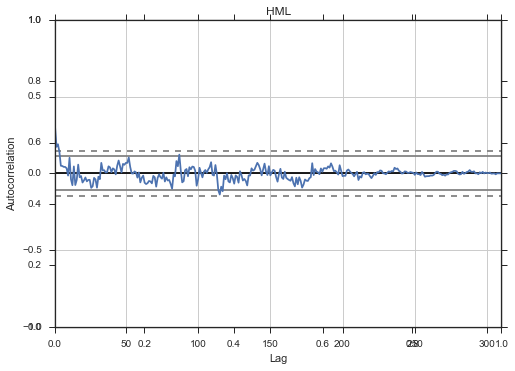

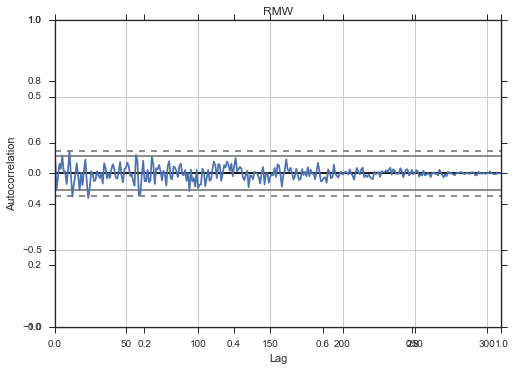

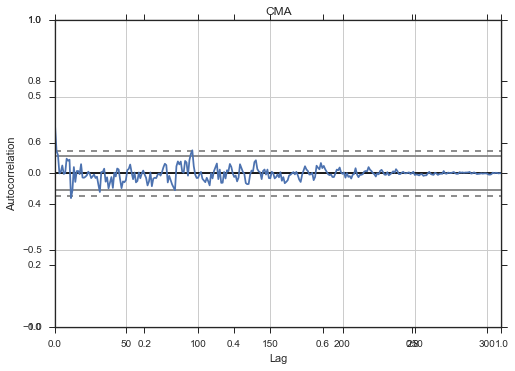

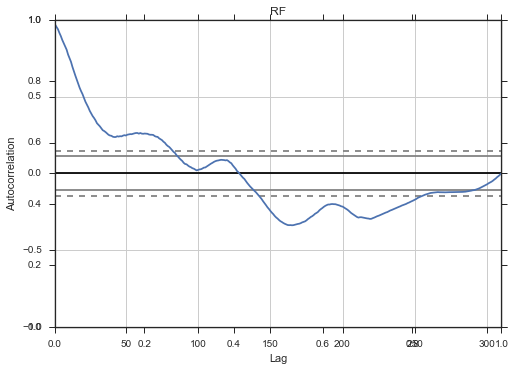

In [7]:
for stock in df.columns:
    plt.figure()
    plt.title(stock)
    autocorrelation_plot(df[stock].dropna()) 

A única série que parece apresentar algum tipo de memória é RMW. Veremos como um AR se ajusta a ela.

In [8]:
import statsmodels.tsa.ar_model as smar

In [9]:
model = smar.AR(df['RMW'])

In [10]:
results = model.fit(5)

In [11]:
results.params

const     0.003244
L1.RMW    0.140823
L2.RMW   -0.120056
L3.RMW   -0.000710
L4.RMW    0.051983
L5.RMW    0.011555
dtype: float64

In [12]:
results.pvalues

const     0.000996
L1.RMW    0.015185
L2.RMW    0.040148
L3.RMW    0.990388
L4.RMW    0.375481
L5.RMW    0.842461
dtype: float64

In [13]:
results = model.fit(2)
results.params

const     0.003567
L1.RMW    0.143490
L2.RMW   -0.126284
dtype: float64

In [14]:
results.pvalues

const     0.000092
L1.RMW    0.011939
L2.RMW    0.026930
dtype: float64

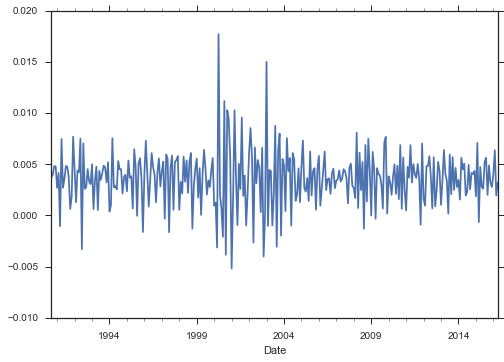

In [15]:
results.fittedvalues.plot()

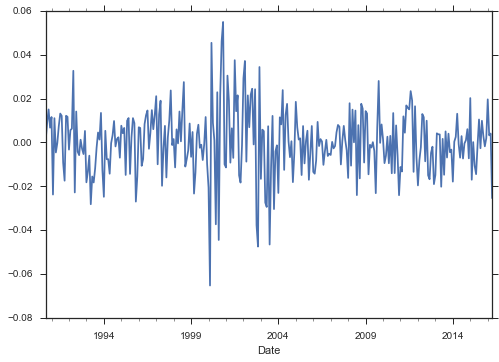

In [16]:
results.resid.plot()

Visualmente os resíduos são bem comportados.

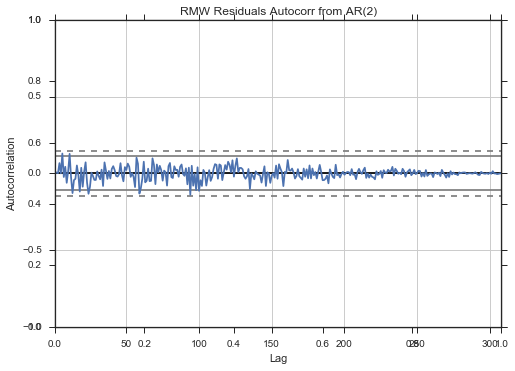

In [17]:
plt.figure()
plt.title('RMW Residuals Autocorr from AR(2)')
autocorrelation_plot(results.resid) 

Temos alguns dos primeiros lags que excedem o valor crítico, porém apenas a 1% de significância. De uma forma geral o AR parece aproximar bem os retornos do fator RMW mas não nos demais.